In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data= pd.read_csv('..//downloads/Social_Network_Ads.csv')

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
le=LabelEncoder()
data['Gender']= le.fit_transform(data['Gender'])

In [11]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [13]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<Axes: >

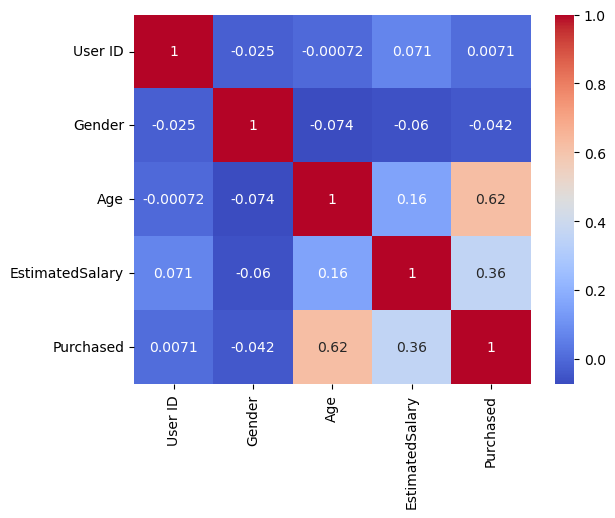

In [15]:
correlation=data.corr()
sns.heatmap(correlation,annot=True, cmap='coolwarm')

<Axes: >

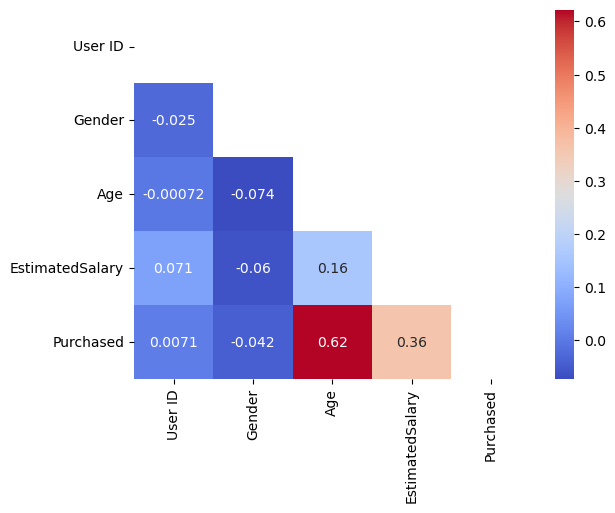

In [17]:
correlation=data.corr()
dependent_corr=correlation['Purchased']
hide=np.triu(np.ones_like(correlation,dtype=bool))
sns.heatmap(correlation,annot=True, cmap='coolwarm', mask=hide)

In [19]:
X=data.drop(['Purchased', 'User ID'], axis=1)
y=data['Purchased']

In [21]:
scaler=StandardScaler()
X=scaler.fit_transform(X[['Age','EstimatedSalary']])

In [25]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)


In [27]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
Y_pred=model.predict(X_test)
Y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

<Axes: >

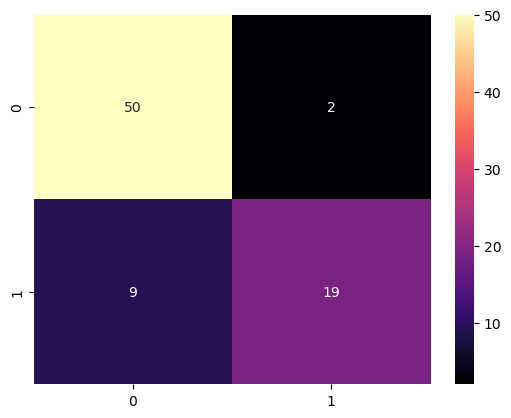

In [33]:
cm=confusion_matrix(y_test,Y_pred)
sns.heatmap(cm, annot=True, cmap='magma')



In [35]:
cf=classification_report(y_test, Y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

